In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_shopping_behavior.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
# Checking for null values
df.isna().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

## Data Cleaning

In [6]:
df['Review Rating'].value_counts()

Review Rating
3.4    182
4.0    181
4.6    170
4.2    169
2.9    166
4.9    162
3.0    162
3.9    162
2.6    158
4.4    158
3.1    156
2.7    154
3.2    152
3.5    152
3.7    149
4.1    148
4.7    148
4.3    147
3.6    147
3.3    146
4.8    144
3.8    141
4.5    139
2.8    136
5.0     68
2.5     66
Name: count, dtype: int64

In [7]:
df.dropna(subset=['Review Rating'], inplace=True)

In [8]:
df['Review Rating'].isna().sum()

0

In [9]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3863 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3863 non-null   int64  
 1   age                     3863 non-null   int64  
 2   gender                  3863 non-null   object 
 3   item_purchased          3863 non-null   object 
 4   category                3863 non-null   object 
 5   purchase_amount_(usd)   3863 non-null   int64  
 6   location                3863 non-null   object 
 7   size                    3863 non-null   object 
 8   color                   3863 non-null   object 
 9   season                  3863 non-null   object 
 10  review_rating           3863 non-null   float64
 11  subscription_status     3863 non-null   object 
 12  shipping_type           3863 non-null   object 
 13  discount_applied        3863 non-null   object 
 14  promo_code_used         3863 non-null   objec

In [11]:
# Creating a new column having four age categories
labels = ['young adult', 'adult', 'middle aged', 'senior']

df['age_group'] = pd.qcut(df['age'], q=4, labels=labels)

In [12]:
df['frequency_of_purchases'].unique()

frequency = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Bi-Weekly': 14,
    'Monthly': 30,
    'Quarterly': 90,
    'Every 3 Months': 90,
    'Annually': 365
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency)

In [13]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_group',
       'purchase_frequency_days'],
      dtype='object')

In [14]:
# Checking if the two columns carry the same values
(df['promo_code_used'] == df['discount_applied']).all()

True

In [17]:
df = df.drop('promo_code_used', axis=1)

KeyError: "['promo_code_used'] not found in axis"

In [18]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [19]:
df = df.rename(columns={'purchase_amount_(usd)': 'purchase_amount'})

## Analysis

In [22]:
df['age'].mean()

44.06756406937613

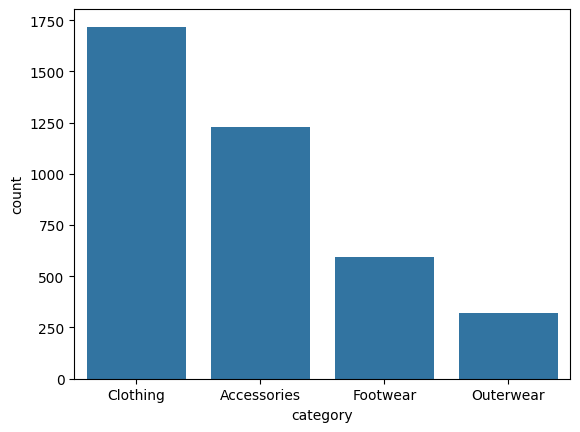

In [25]:
category = df['category'].value_counts()
sns.barplot(category)
plt.show()

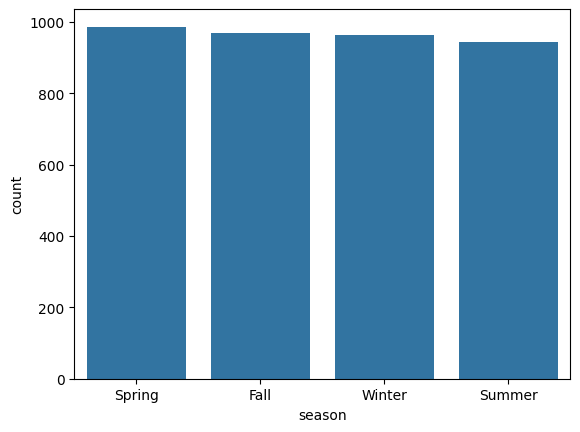

In [27]:
Season = df['season'].value_counts()
sns.barplot(Season)
plt.show()

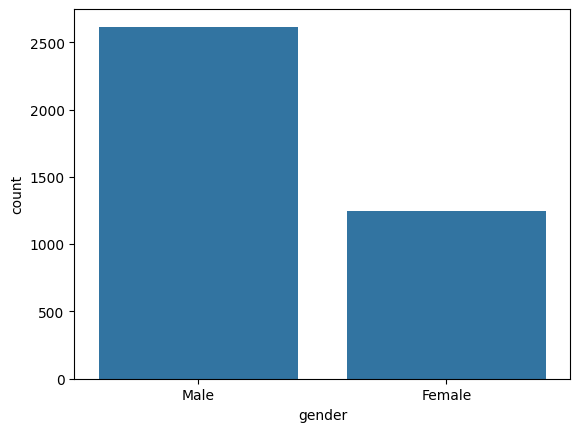

In [28]:
Gender = df['gender'].value_counts()
sns.barplot(Gender)
plt.show()

In [30]:
df['purchase_amount_(usd)'].mean()

59.70204504271292

In [31]:
df['age'].max()

70

In [20]:
df.to_csv('customer_behaviour.csv')

In [ ]:
pip install psycopg2-binary sqlalchemy

In [33]:
from sqlalchemy import create_engine

username = "postgres"
password = "royal23"
host = "localhost"
port = 5432
database = "customer_behaviour"


engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

table_name = "customer"

df.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"Data successfully loaded into {table_name} in database {database}")


Data successfully loaded into customer in database customer_behaviour


In [35]:
df.head(30)

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,middle aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,young adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,middle aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,young adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,middle aged,365
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,14,Venmo,Weekly,middle aged,7
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,49,Cash,Quarterly,senior,90
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,19,Credit Card,Weekly,young adult,7
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,8,Venmo,Annually,young adult,365
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,4,Cash,Quarterly,middle aged,90
